In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("advertising.csv")

In [3]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
dataset.shape

(200, 4)

In [6]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
dataset.duplicated().sum()

0

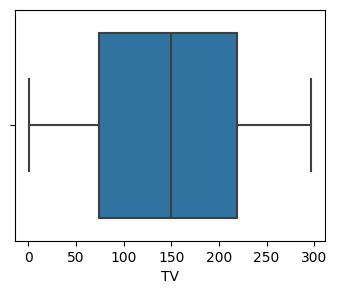

In [8]:
plt.figure(figsize=(4,3))
sns.boxplot(x=dataset["TV"])
plt.show()

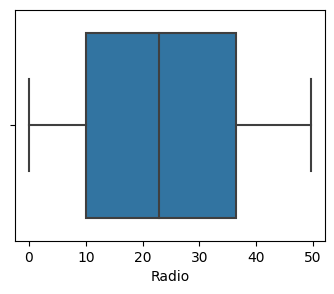

In [9]:
plt.figure(figsize=(4,3))
sns.boxplot(x=dataset["Radio"])
plt.show()

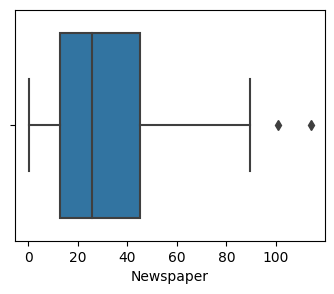

In [10]:
plt.figure(figsize=(4,3))
sns.boxplot(x=dataset["Newspaper"])
plt.show()

In [11]:
q1=np.percentile(dataset["Newspaper"],25)
q3=np.percentile(dataset["Newspaper"],75)
q1,q3

(12.75, 45.1)

In [12]:
iqr=q3-q1
min_range=q1-1.5*iqr
max_range=q3+1.5*iqr
min_range,max_range

(-35.775000000000006, 93.625)

In [13]:
new_dataset=dataset[dataset["Newspaper"]<max_range]

In [14]:
new_dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


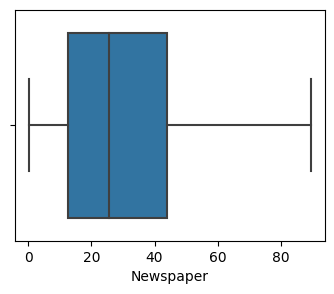

In [15]:
plt.figure(figsize=(4,3))
sns.boxplot(x=new_dataset["Newspaper"])
plt.show()

In [16]:
new_dataset.skew()

TV          -0.082332
Radio        0.114842
Newspaper    0.650112
Sales       -0.079676
dtype: float64

C:\Users\gaura\AppData\Local\Temp\ipykernel_6904\3570037432.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=new_dataset["TV"])


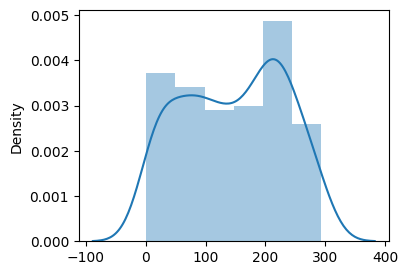

In [17]:
plt.figure(figsize=(4,3))
sns.distplot(x=new_dataset["TV"])
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_6904\3384698219.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=new_dataset["Radio"])


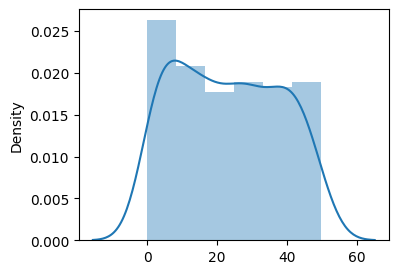

In [18]:
plt.figure(figsize=(4,3))
sns.distplot(x=new_dataset["Radio"])
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_6904\2620256845.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=new_dataset["Newspaper"])


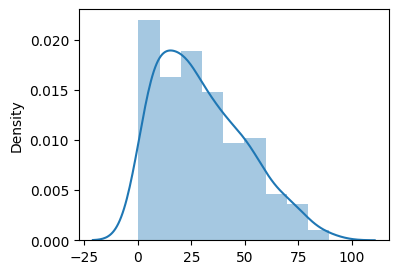

In [19]:
plt.figure(figsize=(4,3))
sns.distplot(x=new_dataset["Newspaper"])
plt.show()

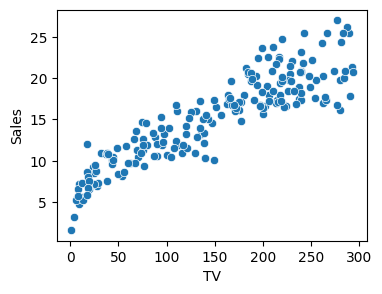

In [20]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="TV",y="Sales",data=new_dataset)
plt.show()

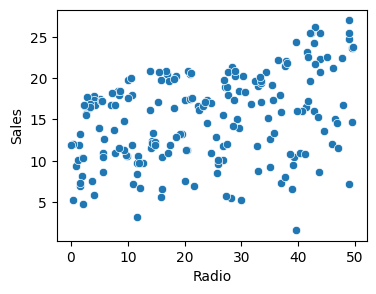

In [21]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="Radio",y="Sales",data=new_dataset)
plt.show()

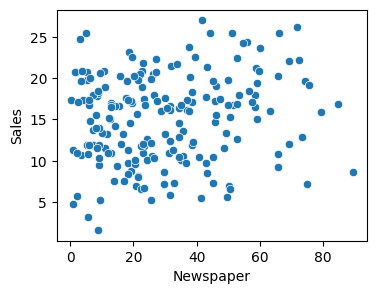

In [22]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="Newspaper",y="Sales",data=new_dataset)
plt.show()

In [23]:
x=new_dataset.iloc[:,:-1]
y=new_dataset["Sales"]

In [24]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [25]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 198, dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
x_train

,TV,Radio,Newspaper
139,184.9,43.9,1.7
5,8.7,48.9,75.0
67,139.3,14.5,10.2
140,73.4,17.0,12.9
106,25.0,11.0,29.7
...,...,...,...
108,13.1,0.4,25.6
14,204.1,32.9,46.0
93,250.9,36.5,72.3
181,218.5,5.4,27.4


In [29]:
y_train

139    20.7
5       7.2
67     13.4
140    10.9
106     7.2
       ... 
108     5.3
14     19.0
93     22.2
181    17.2
104    20.7
Name: Sales, Length: 158, dtype: float64

In [30]:
x_test

,TV,Radio,Newspaper
66,31.5,24.6,2.2
116,139.2,14.3,25.6
17,281.4,39.6,55.8
143,104.6,5.7,34.4
158,11.7,36.9,45.2
128,220.3,49.0,3.2
142,220.5,33.2,37.9
31,112.9,17.4,38.6
19,147.3,23.9,19.1
169,284.3,10.6,6.4


In [31]:
y_test

66     11.0
116    12.2
17     24.4
143    10.4
158     7.3
128    24.7
142    20.1
31     11.9
19     14.6
169    20.0
160    16.4
15     22.4
56      5.5
57     13.2
117     9.4
46     10.6
126     6.6
9      15.6
149    10.1
86     12.0
115    12.6
163    18.0
61     24.2
189     6.7
74     17.0
69     22.3
121     7.0
165    16.9
119     6.6
177    16.7
70     18.3
77     14.2
127    11.9
83     13.6
25     17.0
193    19.6
97     20.5
173    16.7
20     18.0
152    16.6
Name: Sales, dtype: float64

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
lr.predict([[210.7,29.5,9.3]])

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.04232002])

In [35]:
lr.predict([[39.5,41.1,5.8]])

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.95012946])

In [36]:
lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

(91.30003152798272, 89.73073018699192)

In [37]:
mean_squared_error(y_test,lr.predict(x_test))

2.415728945593508

In [38]:
lr.coef_

array([0.05395925, 0.10101512, 0.00746937])

In [39]:
lr.intercept_

4.623695319484101

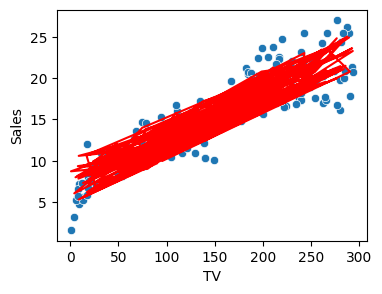

In [40]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="TV",y="Sales",data=new_dataset)
plt.plot(new_dataset["TV"],lr.predict(x),c="red")
plt.show()

In [41]:
from sklearn.tree import DecisionTreeRegressor ,plot_tree

In [42]:
dcr=DecisionTreeRegressor()
dcr.fit(x_train,y_train)

DecisionTreeRegressor()

In [43]:
dcr.predict([[210.7,29.5,9.3]])

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([18.4])

In [44]:
dcr.predict([[39.5,41.1,5.8]])

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([10.8])

In [45]:
dcr.score(x_test,y_test)*100

93.03492262425677

In [46]:
mean_squared_error(y_test,dcr.predict(x_test))

1.9339999999999993

In [47]:
for i in range(1,4):
    dcr1=DecisionTreeRegressor(max_features=i)
    dcr1.fit(x_train,y_train)
    print(dcr.score(x_test,y_test)*100,dcr.score(x_train,y_train)*100,  i)

93.03492262425677 100.0 1
93.03492262425677 100.0 2
93.03492262425677 100.0 3


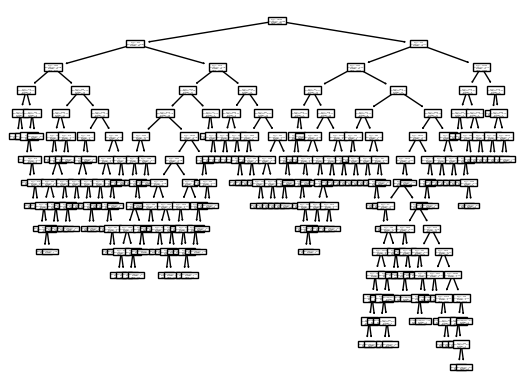

In [48]:
plot_tree(dcr)
plt.show()

In [49]:
from sklearn.svm import SVR

In [50]:
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [51]:
svr.score(x_test,y_test)*100

90.80949888530732

In [52]:
mean_squared_error(y_test,svr.predict(x_test))

2.5519356350178297

In [53]:
dcr.predict([[210.7,29.5,9.3]])

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([18.4])

In [54]:
dcr.predict([[39.5,41.1,5.8]])

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([10.8])

In [55]:
# dcr is the best model